# Data Preparation and Cleaning for Tripadvisor Reviews

## Source 1: Web Scraped Tripadvisor Reviews

### Data Inspection

In [2]:
import pandas as pd

In [3]:
file_path = '/Users/liyuan/Desktop/DSA3101 Project Data/Tripadvisor Reviews/Raw Data/Raw_Paid_TripadvisorReview.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,User Name,User Profile,User Avatar,User Location,Rating,Rating Text,Review Title,Review Text,Trip Type,Helpful Votes,Photos,Published Date,Disclaimer
0,tara888,https://www.tripadvisor.com/Profile/tara888,https://media-cdn.tripadvisor.com/media/photo-...,"Melton, Australia",4,Sep 2024 • Family,Great day out for the whole family and very sh...,"Fantastic day out for the whole family, my kid...",Family,0,https://media-cdn.tripadvisor.com/media/photo-...,"Written September 14, 2024",This review is the subjective opinion of a Tri...
1,john S,https://www.tripadvisor.com/Profile/I9605FSjasons,https://media-cdn.tripadvisor.com/media/photo-...,NaN,1,Sep 2024 • Family,Shortest rides in the history of theme parks.,People will still go because of it marketing a...,Family,0,NaN,"Written September 13, 2024",This review is the subjective opinion of a Tri...
2,SallyStorey,https://www.tripadvisor.com/Profile/SallyStorey,https://media-cdn.tripadvisor.com/media/photo-...,"Adelaide, Australia",4,Sep 2024 • Family,"Good fun, no need for express passes mid-week",We booked this mostly for our kids (aged 8 and...,Family,0,NaN,"Written September 12, 2024",This review is the subjective opinion of a Tri...
3,Sharon,https://www.tripadvisor.com/Profile/GoPlaces36...,https://media-cdn.tripadvisor.com/media/photo-...,Malaysia,1,Sep 2024 • Family,Universal studios singapore - bad customer care,I just bought some uss e tickets online from t...,Family,0,NaN,"Written September 12, 2024",This review is the subjective opinion of a Tri...
4,Chin,https://www.tripadvisor.com/Profile/Pioneer079...,https://media-cdn.tripadvisor.com/media/photo-...,"Singapore, Singapore",5,Sep 2024 • Solo,Fun!,"The park is well-organized, with thrilling rid...",Solo,0,NaN,"Written September 10, 2024",This review is the subjective opinion of a Tri...


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User Name       2982 non-null   object
 1   User Profile    2982 non-null   object
 2   User Avatar     2979 non-null   object
 3   User Location   2338 non-null   object
 4   Rating          3000 non-null   int64 
 5   Rating Text     3000 non-null   object
 6   Review Title    3000 non-null   object
 7   Review Text     3000 non-null   object
 8   Trip Type       2382 non-null   object
 9   Helpful Votes   3000 non-null   int64 
 10  Photos          914 non-null    object
 11  Published Date  3000 non-null   object
 12  Disclaimer      3000 non-null   object
dtypes: int64(2), object(11)
memory usage: 304.8+ KB


,Rating,Helpful Votes
count,3000.000000,3000.0
mean,3.806000,0.0
std,1.349434,0.0
min,1.000000,0.0
25%,3.000000,0.0
50%,4.000000,0.0
75%,5.000000,0.0
max,5.000000,0.0


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nUnique values in 'Trip Type' column:")
print(df['Trip Type'].unique())

print("\nCount of each unique value in 'Trip Type' column:")
print(df['Trip Type'].value_counts())


Missing Values:
User Name           18
User Profile        18
User Avatar         21
User Location      662
Rating               0
Rating Text          0
Review Title         0
Review Text          0
Trip Type          618
Helpful Votes        0
Photos            2086
Published Date       0
Disclaimer           0
dtype: int64

Data Types:
User Name         object
User Profile      object
User Avatar       object
User Location     object
Rating             int64
Rating Text       object
Review Title      object
Review Text       object
Trip Type         object
Helpful Votes      int64
Photos            object
Published Date    object
Disclaimer        object
dtype: object

Unique values in 'Trip Type' column:
['Family' 'Solo' 'Friends' 'Business' 'Couples' nan]

Count of each unique value in 'Trip Type' column:
Trip Type
Family      1339
Couples      590
Friends      326
Solo         115
Business      12
Name: count, dtype: int64


### Data Cleaning

In [10]:
# Drop duplicates
web_tripadvisor_df = df.drop_duplicates()

# Drop unwanted columns, keeping only 'Rating', 'Rating Text', 'Review Title', 'Review Text', 'Trip Type', 'Published Date'
web_tripadvisor_df = web_tripadvisor_df[['Rating', 'Rating Text', 'Review Title', 'Review Text', 'Trip Type', 'Published Date']]

# Extract the date from the 'Rating Text' column and convert it to datetime as 'Date of Visit'
web_tripadvisor_df['Date of Visit'] = pd.to_datetime(web_tripadvisor_df['Rating Text'].str.extract(r'(\w+ \d{4})')[0], format='%b %Y', errors='coerce')

# Drop the "Rating Text" column
web_tripadvisor_df = web_tripadvisor_df.drop(columns=['Rating Text'])

# Convert 'Published Date' to datetime
web_tripadvisor_df['Published Date'] = pd.to_datetime(web_tripadvisor_df['Published Date'].str.replace('Written ', ''), errors='coerce')

# Display the first few rows to check
web_tripadvisor_df.head()

,Rating,Review Title,Review Text,Trip Type,Published Date,Date of Visit
0,4,Great day out for the whole family and very sh...,"Fantastic day out for the whole family, my kid...",Family,2024-09-14,2024-09-01
1,1,Shortest rides in the history of theme parks.,People will still go because of it marketing a...,Family,2024-09-13,2024-09-01
2,4,"Good fun, no need for express passes mid-week",We booked this mostly for our kids (aged 8 and...,Family,2024-09-12,2024-09-01
3,1,Universal studios singapore - bad customer care,I just bought some uss e tickets online from t...,Family,2024-09-12,2024-09-01
4,5,Fun!,"The park is well-organized, with thrilling rid...",Solo,2024-09-10,2024-09-01


In [11]:
# Fill NaN values in 'Trip Type' with 'Unknown'
web_tripadvisor_df['Trip Type'] = web_tripadvisor_df['Trip Type'].fillna('Unknown')

# Combine 'Couples', 'Friends', and 'Business' into a single category called 'Group'
web_tripadvisor_df['Trip Type'] = web_tripadvisor_df['Trip Type'].replace({'Couples': 'Group', 'Friends': 'Group', 'Business': 'Group'})

print("\nUpdated count of each unique value in 'Trip Type' column:")
web_tripadvisor_df['Trip Type'].value_counts()


Updated count of each unique value in 'Trip Type' column:


Trip Type
Family     1252
Group       884
Unknown     617
Solo        106
Name: count, dtype: int64

In [12]:
# Calculate the difference in months between 'Date of Visit' and 'Published Date'
month_diff = (web_tripadvisor_df['Published Date'].dt.year - web_tripadvisor_df['Date of Visit'].dt.year) * 12 + (web_tripadvisor_df['Published Date'].dt.month - web_tripadvisor_df['Date of Visit'].dt.month)

# Check if the review was published within three months of the visit (same month or not more than 3 months apart)
three_month_apart = month_diff.abs() <= 3

# Calculate the percentage of reviews published within three month of the visit
three_month_apart_percentage = three_month_apart.mean() * 100

three_month_apart_percentage

87.12836656173486

In [13]:
# Drop the "Published Date" column
web_tripadvisor_df2 = web_tripadvisor_df.drop(columns=['Published Date'])

## Source 2: Kaggle Tripadvisor Reviews

Downloaded from: https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio/data

### Data Inspection

In [14]:
file_path2 = '/Users/liyuan/Desktop/DSA3101 Project Data/Tripadvisor Reviews/Raw Data/Raw_Kaggle_TripadvisorReviewcsv.csv'
df2 = pd.read_csv(file_path2)

In [15]:
df2.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [16]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


,rating
count,50904.000000
mean,4.256994
std,1.046716
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
print("\nMissing Values:")
print(df2.isnull().sum())

print("\nData Types:")
print(df2.dtypes)

print("\nRating Counts:")
print(df2['rating'].value_counts().sort_index())


Missing Values:
reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

Data Types:
reviewer         object
rating          float64
written_date     object
title            object
review_text      object
branch           object
dtype: object

Rating Counts:
rating
1.0     1973
2.0     1986
3.0     5229
4.0    13514
5.0    28202
Name: count, dtype: int64


### Data Cleaning

#### Justification for using 'written_date' as 'Date of Visit'

Our analysis above shows that over 87% of visitors publish their reviews within three months of their visit. Given that our analysis will be conducted on a quarterly basis (e.g., Jan-Mar, Apr-Jun, etc.), it is reasonable to use the written date of reviews in the Kaggle dataset as a proxy for the actual date of visit. This assumption simplifies our process while aligning with the observed data patterns, making it a practical approach for our analysis.


In [18]:
# Drop duplicates
kaggle_tripadvisor_df = df2.drop_duplicates()

# Filter Kaggle data for Universal Studios Singapore (USS)
kaggle_tripadvisor_df = kaggle_tripadvisor_df[kaggle_tripadvisor_df['branch'] == 'Universal Studios Singapore']

# Drop unwanted columns, keeping only 'Rating', 'Rating Text', 'Review Title', 'Review Text', 'Trip Type', 'Published Date'
kaggle_tripadvisor_df = kaggle_tripadvisor_df[['rating', 'written_date', 'title', 'review_text']]

# Rename 'written_date' to 'Date of Visit'
kaggle_tripadvisor_df = kaggle_tripadvisor_df.rename(columns={'written_date': 'Date of Visit'})

# Convert 'Date of Visit' to datetime format
kaggle_tripadvisor_df['Date of Visit'] = pd.to_datetime(kaggle_tripadvisor_df['Date of Visit'], errors='coerce')

# Rename other columns to match the structure of web_tripadvisor_df2
kaggle_tripadvisor_df = kaggle_tripadvisor_df.rename(columns={
    'rating': 'Rating',
    'title': 'Review Title',
    'review_text': 'Review Text',
    'Date of Visit': 'Date of Visit'
})

In [19]:
kaggle_tripadvisor_df.info()
kaggle_tripadvisor_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15743 entries, 35150 to 50903
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rating         15743 non-null  float64       
 1   Date of Visit  15743 non-null  datetime64[ns]
 2   Review Title   15743 non-null  object        
 3   Review Text    15743 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 615.0+ KB


,Rating,Date of Visit,Review Title,Review Text
35150,5.0,2021-05-26,If someone wanna have some time away from the ...,This place is just awesome. All the rides were...
35151,4.0,2021-05-23,Excellent place!,Excellent place when you plan on going vacatio...
35152,5.0,2021-05-18,Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...
35153,4.0,2021-05-13,Great place,Overall experience is good but queue still pre...
35154,5.0,2021-05-08,Good Place,"Good place for family experience,& easy acces ..."


#### Infer the trip type based on keywords found in the review text:

In [20]:
# Define the function to infer trip type based on keywords in the review text
def infer_trip_type(review):
    review = review.lower()  # Convert text to lowercase for consistency
    
    # Family trip keywords
    family_keywords = ['family', 'kids', 'children', 'daughter', 'son', 'parents', 'mom', 'dad', 'husband', 'wife']
    
    # Solo trip keywords
    solo_keywords = ['solo', 'alone', 'by myself']
    
    # Group trip keywords
    group_keywords = ['friend', 'friends', 'group', 'team', 'buddies', 'gang']

    # Check for each category based on keywords
    if any(keyword in review for keyword in family_keywords):
        return 'Family'
    elif any(keyword in review for keyword in solo_keywords):
        return 'Solo'
    elif any(keyword in review for keyword in group_keywords):
        return 'Group'
    else:
        return 'Unknown'

kaggle_tripadvisor_df['Trip Type'] = kaggle_tripadvisor_df['Review Text'].apply(infer_trip_type)

In [21]:
kaggle_tripadvisor_df.head()

,Rating,Date of Visit,Review Title,Review Text,Trip Type
35150,5.0,2021-05-26,If someone wanna have some time away from the ...,This place is just awesome. All the rides were...,Unknown
35151,4.0,2021-05-23,Excellent place!,Excellent place when you plan on going vacatio...,Family
35152,5.0,2021-05-18,Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...,Family
35153,4.0,2021-05-13,Great place,Overall experience is good but queue still pre...,Unknown
35154,5.0,2021-05-08,Good Place,"Good place for family experience,& easy acces ...",Family


In [22]:
print("\nCount of each unique value in 'Trip Type' column:")
kaggle_tripadvisor_df['Trip Type'].value_counts()


Count of each unique value in 'Trip Type' column:


Trip Type
Family     7550
Unknown    7366
Group       729
Solo         98
Name: count, dtype: int64

## Combine Tripadvisor Reviews from Sources 1 & 2

In [23]:
# Align the columns of both dataframes based on the order of kaggle_tripadvisor_df
web_tripadvisor_df2 = web_tripadvisor_df2[kaggle_tripadvisor_df.columns]

# Combine the two dataframes
tripadvisor_data = pd.concat([web_tripadvisor_df2, kaggle_tripadvisor_df], ignore_index=True)

In [24]:
tripadvisor_data.head()

,Rating,Date of Visit,Review Title,Review Text,Trip Type
0,4.0,2024-09-01,Great day out for the whole family and very sh...,"Fantastic day out for the whole family, my kid...",Family
1,1.0,2024-09-01,Shortest rides in the history of theme parks.,People will still go because of it marketing a...,Family
2,4.0,2024-09-01,"Good fun, no need for express passes mid-week",We booked this mostly for our kids (aged 8 and...,Family
3,1.0,2024-09-01,Universal studios singapore - bad customer care,I just bought some uss e tickets online from t...,Family
4,5.0,2024-09-01,Fun!,"The park is well-organized, with thrilling rid...",Solo


In [26]:
# For Synthetic data generation to align with survey response questions
# Create 'Month of Visit' column based on 3-month intervals
def month_interval(month):
    if month in [1, 2, 3]:
        return 'Jan-Mar'
    elif month in [4, 5, 6]:
        return 'Apr-Jun'
    elif month in [7, 8, 9]:
        return 'Jul-Sep'
    else:
        return 'Oct-Dec'

tripadvisor_data['Month of Visit'] = tripadvisor_data['Date of Visit'].dt.month.apply(month_interval)

In [27]:
# Filter for reviews from 2018 and before
reviews_before_2019 = tripadvisor_data[tripadvisor_data['Date of Visit'].dt.year <= 2019]

# Filter for reviews from 2019 and after
reviews_2019_and_after = tripadvisor_data[tripadvisor_data['Date of Visit'].dt.year >= 2019]

# Count the number of reviews in each category
count_before_2019 = reviews_before_2019.shape[0]
count_2019_and_after = reviews_2019_and_after.shape[0]

print(f"Number of reviews from 2018 and before: {count_before_2019}")
print(f"Number of reviews from 2019 and after: {count_2019_and_after}")

Number of reviews from 2018 and before: 17395
Number of reviews from 2019 and after: 4293


In [28]:
tripadvisor_data = reviews_2019_and_after

## Text Cleaning

### Text Preprocessing Approach

The following code performs text preprocessing steps to prepare the data for sentiment analysis and other NLP tasks. The steps include:
- **Lowercasing**: Ensures uniformity by converting all text to lowercase.
- **Emoji Handling**: Converts emojis into their textual representations to preserve sentiment information.
- **Punctuation Removal**: Removes unnecessary punctuation to reduce noise in the text.
- **Stopwords Removal**: Eliminates common words that do not contribute to the sentiment.
- **Lemmatization**: Reduces words to their base form to improve model performance by grouping similar words together.

This cleaning process prepares the text for better performance in sentiment analysis by focusing on the most important information and reducing text complexity.


In [28]:
#!pip install neattext
#!pip install emoji

In [29]:
import neattext.functions as nfx
import nltk
import string
from emoji import demojize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [30]:
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/liyuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/liyuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/liyuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# (1) Lowercase transformation
tripadvisor_data['Review Title Lower'] = tripadvisor_data['Review Title'].str.lower()
tripadvisor_data['Review Text Lower'] = tripadvisor_data['Review Text'].str.lower()

# (2) Handle emojis by converting to their textual representation
tripadvisor_data['Review Title Emoji'] = tripadvisor_data['Review Title Lower'].apply(lambda text: demojize(text))
tripadvisor_data['Review Text Emoji'] = tripadvisor_data['Review Text Lower'].apply(lambda text: demojize(text))

# (3) Removal of punctuations
punc_to_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_to_remove))

tripadvisor_data['Review Title No Punctuation'] = tripadvisor_data['Review Title Emoji'].apply(remove_punctuation)
tripadvisor_data['Review Text No Punctuation'] = tripadvisor_data['Review Text Emoji'].apply(remove_punctuation)

# (4) Removal of stopwords
STOPWORDS = set(stopwords.words("english"))

def remove_stopword(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

tripadvisor_data['Review Title No Stopwords'] = tripadvisor_data['Review Title No Punctuation'].apply(remove_stopword)
tripadvisor_data['Review Text No Stopwords'] = tripadvisor_data['Review Text No Punctuation'].apply(remove_stopword)

# (5) Lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatized_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tripadvisor_data['Review Title Cleaned'] = tripadvisor_data['Review Title No Stopwords'].apply(lemmatized_words)
tripadvisor_data['Review Text Cleaned'] = tripadvisor_data['Review Text No Stopwords'].apply(lemmatized_words)

In [32]:
tripadvisor_data.head()

,Rating,Date of Visit,Review Title,Review Text,Trip Type,Month of Visit,Review Title Lower,Review Text Lower,Review Title Emoji,Review Text Emoji,Review Title No Punctuation,Review Text No Punctuation,Review Title No Stopwords,Review Text No Stopwords,Review Title Cleaned,Review Text Cleaned
0,4.0,2024-09-01,Great day out for the whole family and very sh...,"Fantastic day out for the whole family, my kid...",Family,Jul-Sep,great day out for the whole family and very sh...,"fantastic day out for the whole family, my kid...",great day out for the whole family and very sh...,"fantastic day out for the whole family, my kid...",great day out for the whole family and very sh...,fantastic day out for the whole family my kids...,great day whole family short ride lines monday,fantastic day whole family kids age 11 7 loved...,great day whole family short ride line monday,fantastic day whole family kid age 11 7 love r...
1,1.0,2024-09-01,Shortest rides in the history of theme parks.,People will still go because of it marketing a...,Family,Jul-Sep,shortest rides in the history of theme parks.,people will still go because of it marketing a...,shortest rides in the history of theme parks.,people will still go because of it marketing a...,shortest rides in the history of theme parks,people will still go because of it marketing a...,shortest rides history theme parks,people still go marketing brand name honestly ...,short ride history theme park,people still go market brand name honestly the...
2,4.0,2024-09-01,"Good fun, no need for express passes mid-week",We booked this mostly for our kids (aged 8 and...,Family,Jul-Sep,"good fun, no need for express passes mid-week",we booked this mostly for our kids (aged 8 and...,"good fun, no need for express passes mid-week",we booked this mostly for our kids (aged 8 and...,good fun no need for express passes midweek,we booked this mostly for our kids aged 8 and ...,good fun need express passes midweek,booked mostly kids aged 8 nearly 7 surprised m...,good fun need express pass midweek,book mostly kid age 8 nearly 7 surprised much ...
3,1.0,2024-09-01,Universal studios singapore - bad customer care,I just bought some uss e tickets online from t...,Family,Jul-Sep,universal studios singapore - bad customer care,i just bought some uss e tickets online from t...,universal studios singapore - bad customer care,i just bought some uss e tickets online from t...,universal studios singapore bad customer care,i just bought some uss e tickets online from t...,universal studios singapore bad customer care,bought uss e tickets online official website h...,universal studio singapore bad customer care,buy uss e ticket online official website howev...
4,5.0,2024-09-01,Fun!,"The park is well-organized, with thrilling rid...",Solo,Jul-Sep,fun!,"the park is well-organized, with thrilling rid...",fun!,"the park is well-organized, with thrilling rid...",fun,the park is wellorganized with thrilling rides...,fun,park wellorganized thrilling rides immersive t...,fun,park wellorganized thrill ride immersive theme...


In [34]:
# Drop intermediate columns, keeping only the original and cleaned versions
tripadvisor_data = tripadvisor_data[['Rating','Date of Visit','Review Title', 'Review Text', 'Trip Type', 'Month of Visit', 'Review Title Cleaned', 'Review Text Cleaned']]

In [46]:
tripadvisor_data.head()

,Rating,Date of Visit,Review Title,Review Text,Trip Type,Month of Visit,Weekday or Weekend,Review Title Cleaned,Review Text Cleaned
0,4.0,2024-09-01,Great day out for the whole family and very short ride lines (on a Monday),"Fantastic day out for the whole family, my kids age 11 and 7 loved all the rides, wait time was less than 10 minutes for all rides (we went in right on 10am open) and made sure we went on a weekday not on school holidays. Good mix of thrill rides for my 12 year old and us adults and good choices for slower rides for my little one. Waterworld show was fantastic and staff all very helpful",Family,Jul-Sep,Weekend,great day whole family short ride line monday,fantastic day whole family kid age 11 7 love ride wait time less 10 minute rid go right 10am open make sure go weekday school holiday good mix thrill rid 12 year old u adults good choice slow ride little one waterworld show fantastic staff helpful
1,1.0,2024-09-01,Shortest rides in the history of theme parks.,"People will still go because of it marketing and brand name, but honestly this theme park is a joke. Some rides last like 20 or 30 seconds… the park should be outlawed as illegal. Terrible food outlets… closes at 6pm. I guess for Instagram photos but wow… what a terrible park.",Family,Jul-Sep,Weekend,short ride history theme park,people still go market brand name honestly theme park joke ride last like 20 30 seconds… park outlaw illegal terrible food outlets… close 6pm guess instagram photo wow… terrible park
2,4.0,2024-09-01,"Good fun, no need for express passes mid-week","We booked this mostly for our kids (aged 8 and nearly 7) but I was surprised how much fun it was for us adults too. Being worried about the lines we coughed up extra for the express passes but really didn’t need to because when we arrived (at 10am as soon as it opened) we could get into everything without waiting. After lunch we started to use the express pass but if we hadn’t already bought it, that would have been fine, we just wouldn’t have repeated so many rides. We were there on a Wednesday so maybe it’s a mid-week thing that it wasn’t so busy. <br />The kids loved the meet and greets too and the live shows.",Family,Jul-Sep,Weekend,good fun need express pass midweek,book mostly kid age 8 nearly 7 surprised much fun u adult worry line cough extra express pass really didn’t need arrive 10am soon open could get everything without wait lunch start use express pas hadn’t already buy would fine wouldn’t repeat many ride wednesday maybe it’s midweek thing wasn’t busy br kid love meet greets live show
3,1.0,2024-09-01,Universal studios singapore - bad customer care,"I just bought some uss e tickets online from the official website. However, I did not receive an email or any verification. My credit card was charged and I have an order no. I am unable to connect with anyone from USS and emails sent are not responded to. what do I do?",Family,Jul-Sep,Weekend,universal studio singapore bad customer care,buy uss e ticket online official website however receive email verification credit card charge order unable connect anyone uss email send respond
4,5.0,2024-09-01,Fun!,"The park is well-organized, with thrilling rides, immersive themed zones, and entertaining shows. Highlights include the Transformers ride, Jurassic Park, and the Hollywood street performances. The atmosphere is vibrant and energetic, with plenty of dining and shopping options to enjoy between attractions. The staff is friendly and helpful, adding to the overall experience. It’s a must-visit for anyone looking for a day of adventure and fun in Singapore!",Solo,Jul-Sep,Weekend,fun,park wellorganized thrill ride immersive theme zone entertain show highlight include transformer ride jurassic park hollywood street performance atmosphere vibrant energetic plenty din shopping option enjoy attraction staff friendly helpful add overall experience it’s mustvisit anyone look day adventure fun singapore


In [35]:
# Set display options to view the full content of each column
pd.set_option('display.max_colwidth', None)

sample_row = tripadvisor_data[['Review Title', 'Review Text', 'Review Title Cleaned', 'Review Text Cleaned']].iloc[21]
print(sample_row)

Review Title                                                                                                                                                                                                                                                                                                                                                                                                                                       Poor organization & Waste of time 👎
Review Text             Worst customer service ever, poor organization. I had waited in the single line and staff had no professional sense at all, she let all the persons who stood up in normal line play even they came alone even if the single had stood for ages. The cylon which is the highlight of this place had technical issues and could not be played. Go to other universal studios, in Osaka is much more pleasant or visit other places in SG would worth your time.
Review Title Cleaned                                      

In [37]:
tripadvisor_data_cleaned = tripadvisor_data[['Rating','Date of Visit','Trip Type', 'Month of Visit', 'Review Title Cleaned', 'Review Text Cleaned']]

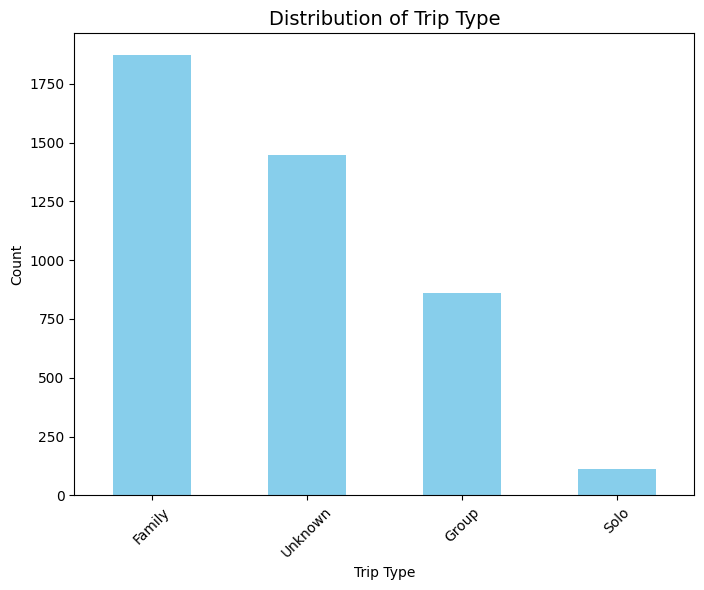

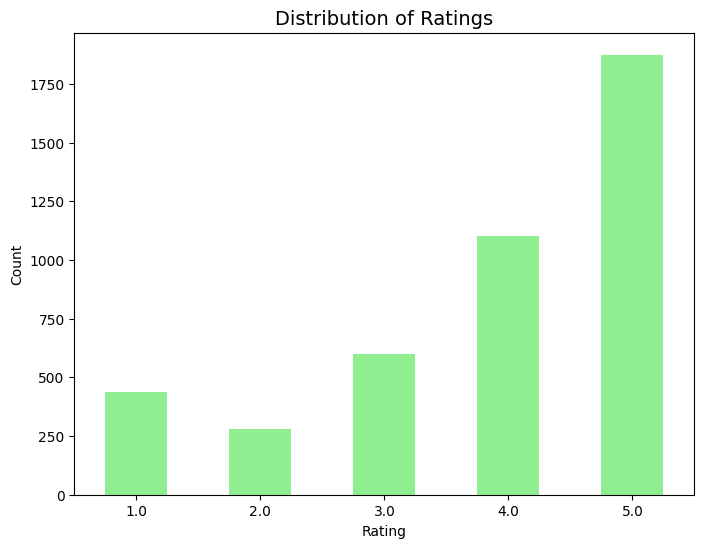

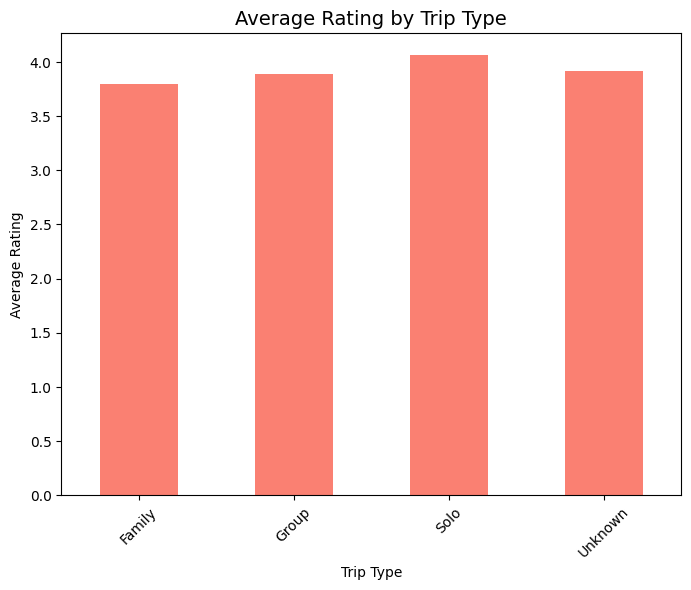

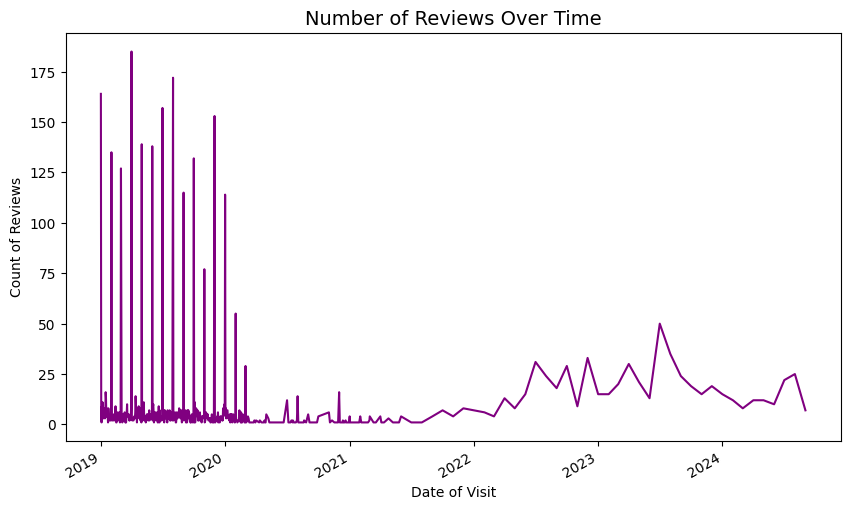

In [51]:
import matplotlib.pyplot as plt

# 1: Plot distribution of Trip Type
plt.figure(figsize=(8, 6))
tripadvisor_data_cleaned['Trip Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Trip Type', fontsize=14)
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2: Plot distribution of Ratings
plt.figure(figsize=(8, 6))
tripadvisor_data_cleaned['Rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3: Show average rating by Trip Type
plt.figure(figsize=(8, 6))
tripadvisor_data_cleaned.groupby('Trip Type')['Rating'].mean().plot(kind='bar', color='salmon')
plt.title('Average Rating by Trip Type', fontsize=14)
plt.xlabel('Trip Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# 4: Distribution of reviews over time (based on Date of Visit)
plt.figure(figsize=(10, 6))
tripadvisor_data_cleaned['Date of Visit'].value_counts().sort_index().plot(kind='line', color='purple')
plt.title('Number of Reviews Over Time', fontsize=14)
plt.xlabel('Date of Visit')
plt.ylabel('Count of Reviews')
plt.show()

## Approach to Classifying Visit Categories

This code aims to categorize each visit date into one of four categories based on the type of day and whether it falls on a public holiday. This enables future data merging and analysis by standardizing the visit categories in a way that aligns with our survey response question.

1. **Public Holiday Parsing**: A list of public holiday dates from 2019 to 2024 is provided.  https://www.mom.gov.sg/newsroom/press-releases/2019/0408-public-holidays-for-2020

2. **Category Mapping**: For each entry in the `Date of Visit` column, we categorize the date as follows:
   - **Weekdays**: Regular weekdays that do not coincide with public holidays.
   - **Weekends**: Regular weekends that do not coincide with public holidays.
   - **Weekdays during Public/School Holidays**: Weekdays that fall on public holidays.
   - **Weekends during Public/School Holidays**: Weekends that fall on public holidays.

In [40]:
from datetime import datetime

# Define the dictionary with public holidays from 2019 to 2024
public_holidays = {
    2019: {
        "New Year's Day": "1 Jan 2019",
        "Chinese New Year": ["5 Feb 2019", "6 Feb 2019"],
        "Good Friday": "19 Apr 2019",
        "Labour Day": "1 May 2019",
        "Vesak Day": "19 May 2019",
        "Hari Raya Puasa": "5 Jun 2019",
        "National Day": "9 Aug 2019",
        "Hari Raya Haji": "11 Aug 2019",
        "Deepavali": "27 Oct 2019",
        "Christmas Day": "25 Dec 2019"
    },
    2020: {
        "New Year's Day": "1 Jan 2020",
        "Chinese New Year": ["25 Jan 2020", "26 Jan 2020"],
        "Good Friday": "10 Apr 2020",
        "Labour Day": "1 May 2020",
        "Vesak Day": "7 May 2020",
        "Hari Raya Puasa": "24 May 2020",
        "Hari Raya Haji": "31 Jul 2020",
        "National Day": "9 Aug 2020",
        "Deepavali": "14 Nov 2020",
        "Christmas Day": "25 Dec 2020"
    },
    2021: {
        "New Year's Day": "1 Jan 2021",
        "Chinese New Year": ["12 Feb 2021", "13 Feb 2021"],
        "Good Friday": "2 Apr 2021",
        "Labour Day": "1 May 2021",
        "Hari Raya Puasa": "13 May 2021",
        "Vesak Day": "26 May 2021",
        "Hari Raya Haji": "20 Jul 2021",
        "National Day": "9 Aug 2021",
        "Deepavali": "4 Nov 2021",
        "Christmas Day": "25 Dec 2021"
    },
    2022: {
        "New Year's Day": "1 Jan 2022",
        "Chinese New Year": ["1 Feb 2022", "2 Feb 2022"],
        "Good Friday": "15 Apr 2022",
        "Labour Day": "1 May 2022",
        "Hari Raya Puasa": "2 May 2022",
        "Vesak Day": "15 May 2022",
        "Hari Raya Haji": "9 Jul 2022",
        "National Day": "9 Aug 2022",
        "Deepavali": "24 Oct 2022",
        "Christmas Day": "25 Dec 2022"
    },
    2023: {
        "New Year's Day": "1 Jan 2023",
        "Chinese New Year": ["22 Jan 2023", "23 Jan 2023"],
        "Good Friday": "7 Apr 2023",
        "Hari Raya Puasa": "22 Apr 2023",
        "Labour Day": "1 May 2023",
        "Vesak Day": "3 Jun 2023",
        "Hari Raya Haji": "29 Jun 2023",
        "National Day": "9 Aug 2023",
        "Deepavali": "12 Nov 2023",
        "Christmas Day": "25 Dec 2023"
    },
    2024: {
        "New Year's Day": "1 Jan 2024",
        "Chinese New Year": ["10 Feb 2024", "11 Feb 2024"],
        "Good Friday": "29 Mar 2024",
        "Hari Raya Puasa": "10 Apr 2024",
        "Labour Day": "1 May 2024",
        "Vesak Day": "22 May 2024",
        "Hari Raya Haji": "17 Jun 2024",
        "National Day": "9 Aug 2024",
        "Deepavali": "31 Oct 2024",
        "Christmas Day": "25 Dec 2024"
    }
}

In [41]:
# Convert the public holiday dictionary to a list of datetime dates for easy comparison
public_holiday_dates = []
for year, holidays in public_holidays.items():
    for holiday, date in holidays.items():
        if isinstance(date, list):
            public_holiday_dates.extend([datetime.strptime(d, '%d %b %Y').date() for d in date])
        else:
            public_holiday_dates.append(datetime.strptime(date, '%d %b %Y').date())

In [50]:
tripadvisor_data_cleaned['Visit Category'] = tripadvisor_data_cleaned['Date of Visit'].apply(
    lambda x: (
        'Weekends during Public/School Holidays' if x in public_holiday_dates and x.weekday() >= 5 else
        'Weekdays during Public/School Holidays' if x in public_holiday_dates and x.weekday() < 5 else
        'Weekends' if x.weekday() >= 5 else
        'Weekdays'
    )
)

/var/folders/p2/qryy8jg11cg6pc17_dbf_z580000gn/T/ipykernel_88181/1814963207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripadvisor_data_cleaned['Visit Category'] = tripadvisor_data_cleaned['Date of Visit'].apply(


In [59]:
category_counts = tripadvisor_data_cleaned['Visit Category'].value_counts()
category_counts

<class 'pandas.core.frame.DataFrame'>
Index: 4293 entries, 0 to 4602
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Rating                4293 non-null   float64       
 1   Date of Visit         4293 non-null   datetime64[ns]
 2   Trip Type             4293 non-null   object        
 3   Month of Visit        4293 non-null   object        
 4   Review Title Cleaned  4293 non-null   object        
 5   Review Text Cleaned   4293 non-null   object        
 6   Visit Category        4293 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 268.3+ KB


In [60]:
tripadvisor_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4293 entries, 0 to 4602
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Rating                4293 non-null   float64       
 1   Date of Visit         4293 non-null   datetime64[ns]
 2   Trip Type             4293 non-null   object        
 3   Month of Visit        4293 non-null   object        
 4   Review Title Cleaned  4293 non-null   object        
 5   Review Text Cleaned   4293 non-null   object        
 6   Visit Category        4293 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 268.3+ KB


In [53]:
# Save as csv file
tripadvisor_data_cleaned.to_csv('tripadvisor_data_cleaned.csv', index=False)